In [102]:

import pandas as pd

clin_data = pd.read_csv('data/all_clinical_data_normalized.csv')
clin_data = clin_data[['patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

In [103]:
# Get all unique patient ids and visit months
patient_ids = clin_data['patient_id'].unique()
visit_months = clin_data['visit_month'].unique()

# Create a new dataframe with all possible combinations of patient id and visit month
new_rows = pd.DataFrame([(patient_id, visit_month) for patient_id in patient_ids for visit_month in visit_months], columns=['patient_id', 'visit_month'])

# Merge the new dataframe with the original dataframe
expanded_data = pd.merge(new_rows, clin_data, how='left', on=['patient_id', 'visit_month'])


In [104]:
patient_data = {}
for patient_id in expanded_data.patient_id.unique():
    mask = expanded_data['patient_id'] == patient_id
    patient_data[patient_id] = expanded_data.loc[mask]

patient_data.keys()



dict_keys([55, 942, 1517, 1923, 2660, 3636, 3863, 4161, 4172, 4923, 5027, 5036, 5178, 5645, 5742, 6054, 6211, 6420, 7051, 7117, 7151, 7265, 7508, 7568, 7832, 7886, 8344, 8699, 10053, 10138, 10174, 10541, 10715, 10718, 11459, 11686, 11928, 12516, 12636, 12703, 12755, 12931, 13360, 13368, 13618, 13804, 13852, 13968, 14035, 14124, 14242, 14270, 14344, 14450, 14811, 15009, 15245, 15504, 15590, 16238, 16347, 16566, 16574, 16778, 16931, 17154, 17201, 17414, 17727, 18183, 18204, 18553, 18560, 19088, 20212, 20216, 20352, 20404, 20460, 20581, 20664, 20707, 20791, 20792, 21126, 21537, 21729, 22126, 22623, 23175, 23192, 23244, 23391, 23636, 24278, 24690, 24818, 24820, 24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210, 26809, 27079, 27300, 27464, 27468, 27607, 27715, 27872, 27893, 27971, 27987, 28327, 28342, 28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121, 31154, 31270, 31693, 33108, 33548, 33558, 34182, 35231, 35465, 35477, 35675, 35696, 36797, 37220, 37312, 37566, 38419

In [105]:
for patient_id in patient_data.keys():
    patient_data[patient_id] = (patient_data[patient_id]
                                .interpolate(method='linear', axis=0, limit_direction='both')
                                .fillna(method='ffill')
                                .fillna(method='bfill')
                                .query('visit_month != 5'))


In [106]:
patient_data[55]

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,55,0,0.687651,-0.111025,-0.432697,-0.451286
1,55,3,0.687651,0.062164,0.284364,-0.451286
2,55,6,0.295773,0.581731,0.929718,-0.451286
3,55,9,0.295773,0.408542,0.642894,-0.451286
4,55,12,0.687651,0.581731,1.431661,-0.451286
5,55,18,0.099834,1.101299,1.216543,-0.451286
6,55,24,1.863284,0.408542,2.005310,-0.451286
7,55,30,1.471406,1.101299,2.005310,-0.451286
8,55,36,2.059223,1.967245,2.148722,-0.451286
9,55,42,1.079528,2.313624,1.431661,-0.451286


In [107]:
## TODO create and train model

In [108]:
patient_data.keys()

dict_keys([55, 942, 1517, 1923, 2660, 3636, 3863, 4161, 4172, 4923, 5027, 5036, 5178, 5645, 5742, 6054, 6211, 6420, 7051, 7117, 7151, 7265, 7508, 7568, 7832, 7886, 8344, 8699, 10053, 10138, 10174, 10541, 10715, 10718, 11459, 11686, 11928, 12516, 12636, 12703, 12755, 12931, 13360, 13368, 13618, 13804, 13852, 13968, 14035, 14124, 14242, 14270, 14344, 14450, 14811, 15009, 15245, 15504, 15590, 16238, 16347, 16566, 16574, 16778, 16931, 17154, 17201, 17414, 17727, 18183, 18204, 18553, 18560, 19088, 20212, 20216, 20352, 20404, 20460, 20581, 20664, 20707, 20791, 20792, 21126, 21537, 21729, 22126, 22623, 23175, 23192, 23244, 23391, 23636, 24278, 24690, 24818, 24820, 24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210, 26809, 27079, 27300, 27464, 27468, 27607, 27715, 27872, 27893, 27971, 27987, 28327, 28342, 28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121, 31154, 31270, 31693, 33108, 33548, 33558, 34182, 35231, 35465, 35477, 35675, 35696, 36797, 37220, 37312, 37566, 38419

In [116]:
# Create an empty DataFrame to store the preprocessed data
preprocessed_data = pd.DataFrame()

# Iterate through the patient_data dictionary
for patient_id, data in patient_data.items():
    # Set the index of the DataFrame to 'visit_month' for easier access to data based on the month

    data = data.set_index('visit_month')
    
    # Iterate through the rows of the patient's data
    for visit_month, row in data.iterrows():
        # Create a new row for the preprocessed_data DataFrame with the current UPDRS scores
        new_row = {
            'patient_id': patient_id,
            'visit_month': visit_month,
            'updrs_1': row['updrs_1'],
            'updrs_2': row['updrs_2'],
            'updrs_3': row['updrs_3'],
            'updrs_4': row['updrs_4']
        }
        
        # Iterate through the list of offsets [6, 12, 24] to find the UPDRS scores at +6, +12, and +24 months
        for offset in [6, 12, 24]:
            # Calculate the target month by adding the offset to the current visit_month
            target_month = visit_month + offset
            
            # Check if the target_month exists in the patient's data
            if target_month in data.index:
                # If it exists, get the UPDRS scores at the target_month
                target_row = data.loc[target_month]
                
                # Add the UPDRS scores at the target_month to the new_row
                new_row[f'updrs_1_{offset}m'] = target_row['updrs_1']
                new_row[f'updrs_2_{offset}m'] = target_row['updrs_2']
                new_row[f'updrs_3_{offset}m'] = target_row['updrs_3']
                new_row[f'updrs_4_{offset}m'] = target_row['updrs_4']
            else:
                # If the target_month does not exist, set the corresponding UPDRS scores to NaN
                new_row[f'updrs_1_{offset}m'] = np.nan
                new_row[f'updrs_2_{offset}m'] = np.nan
                new_row[f'updrs_3_{offset}m'] = np.nan
                new_row[f'updrs_4_{offset}m'] = np.nan
        
        # Append the new_row to the preprocessed_data DataFrame
        new_row_df = pd.DataFrame(new_row, index=[0])
        preprocessed_data = pd.concat([preprocessed_data, new_row_df], ignore_index=True)

In [118]:
preprocessed_data = preprocessed_data.dropna()
preprocessed_data

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,updrs_1_6m,updrs_2_6m,updrs_3_6m,updrs_4_6m,updrs_1_12m,updrs_2_12m,updrs_3_12m,updrs_4_12m,updrs_1_24m,updrs_2_24m,updrs_3_24m,updrs_4_24m
0,55,0,0.687651,-0.111025,-0.432697,-0.451286,0.295773,0.581731,0.929718,-0.451286,0.687651,0.581731,1.431661,-0.451286,1.863284,0.408542,2.005310,-0.451286
2,55,6,0.295773,0.581731,0.929718,-0.451286,0.687651,0.581731,1.431661,-0.451286,0.099834,1.101299,1.216543,-0.451286,1.471406,1.101299,2.005310,-0.451286
4,55,12,0.687651,0.581731,1.431661,-0.451286,0.099834,1.101299,1.216543,-0.451286,1.863284,0.408542,2.005310,-0.451286,2.059223,1.967245,2.148722,-0.451286
5,55,18,0.099834,1.101299,1.216543,-0.451286,1.863284,0.408542,2.005310,-0.451286,1.471406,1.101299,2.005310,-0.451286,1.079528,2.313624,1.431661,-0.451286
6,55,24,1.863284,0.408542,2.005310,-0.451286,1.471406,1.101299,2.005310,-0.451286,2.059223,1.967245,2.148722,-0.451286,2.059223,1.620867,2.220428,-0.451286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14829,65530,18,0.442727,-0.327512,-0.190689,0.611042,0.393742,-0.370809,-0.271359,0.823507,0.344757,-0.414107,-0.352028,1.035973,0.295773,-0.457404,-0.432697,1.248438
14830,65530,24,0.393742,-0.370809,-0.271359,0.823507,0.344757,-0.414107,-0.352028,1.035973,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438
14831,65530,30,0.344757,-0.414107,-0.352028,1.035973,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438
14832,65530,36,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438,0.295773,-0.457404,-0.432697,1.248438


In [109]:
print(type(patient_data[55]))
print(patient_data[55])

<class 'pandas.core.frame.DataFrame'>
    patient_id  visit_month   updrs_1   updrs_2   updrs_3   updrs_4
0           55            0  0.687651 -0.111025 -0.432697 -0.451286
1           55            3  0.687651  0.062164  0.284364 -0.451286
2           55            6  0.295773  0.581731  0.929718 -0.451286
3           55            9  0.295773  0.408542  0.642894 -0.451286
4           55           12  0.687651  0.581731  1.431661 -0.451286
5           55           18  0.099834  1.101299  1.216543 -0.451286
6           55           24  1.863284  0.408542  2.005310 -0.451286
7           55           30  1.471406  1.101299  2.005310 -0.451286
8           55           36  2.059223  1.967245  2.148722 -0.451286
9           55           42  1.079528  2.313624  1.431661 -0.451286
10          55           48  2.059223  1.620867  2.220428 -0.451286
11          55           54  1.079528  1.967245  2.148722 -0.451286
12          55           60  3.234856  2.486813  2.507252 -0.451286
13        

In [119]:
import numpy as np

# Get a list of unique patient IDs
unique_patient_ids = preprocessed_data['patient_id'].unique()

# Shuffle the patient IDs
np.random.shuffle(unique_patient_ids)

# Assign patient IDs to train (70%), validation (15%), and test (15%) sets
train_size = int(0.7 * len(unique_patient_ids))
val_size = int(0.15 * len(unique_patient_ids))

train_ids = unique_patient_ids[:train_size]
val_ids = unique_patient_ids[train_size:train_size + val_size]
test_ids = unique_patient_ids[train_size + val_size:]

# Create train, validation, and test DataFrames by selecting rows with corresponding patient IDs
train_data = preprocessed_data[preprocessed_data['patient_id'].isin(train_ids)]
val_data = preprocessed_data[preprocessed_data['patient_id'].isin(val_ids)]
test_data = preprocessed_data[preprocessed_data['patient_id'].isin(test_ids)]


In [126]:
trn = len(train_data)
val = len(val_data)
tst = len(test_data)


print(trn, val, tst)
ttl = trn + val + tst
print(trn/ttl, val/ttl, tst/ttl)

4888 1040 1056
0.699885452462772 0.14891179839633448 0.15120274914089346


In [127]:
train_data.columns

Index(['patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'updrs_1_6m', 'updrs_2_6m', 'updrs_3_6m', 'updrs_4_6m', 'updrs_1_12m',
       'updrs_2_12m', 'updrs_3_12m', 'updrs_4_12m', 'updrs_1_24m',
       'updrs_2_24m', 'updrs_3_24m', 'updrs_4_24m'],
      dtype='object')

Linear Regression - model all updrs_?

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the input features for each UPDRS score
input_features = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

# Define target labels for each time point
target_labels_6m = ['updrs_1_6m', 'updrs_2_6m', 'updrs_3_6m', 'updrs_4_6m']
target_labels_12m = ['updrs_1_12m', 'updrs_2_12m', 'updrs_3_12m', 'updrs_4_12m']
target_labels_24m = ['updrs_1_24m', 'updrs_2_24m', 'updrs_3_24m', 'updrs_4_24m']

# Define a function to train and evaluate a linear regression model for a given target label and time point
def train_and_evaluate_model(train_data, val_data, input_features, label):
    # Train the linear regression model using only train_data
    model = LinearRegression()
    model.fit(train_data[input_features], train_data[label])

    # Predict the UPDRS scores for the val_data
    predictions = model.predict(val_data[input_features])

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(val_data[label], predictions)
    print(f'MSE for {label}: {mse:.3f}')

# Train and evaluate models for each time point
for label_6m, label_12m, label_24m in zip(target_labels_6m, target_labels_12m, target_labels_24m):
    train_and_evaluate_model(train_data, val_data, input_features, label_6m)
    train_and_evaluate_model(train_data, val_data, input_features, label_12m)
    train_and_evaluate_model(train_data, val_data, input_features, label_24m)


MSE for updrs_1_6m: 0.133
MSE for updrs_1_12m: 0.172
MSE for updrs_1_24m: 0.247
MSE for updrs_2_6m: 0.097
MSE for updrs_2_12m: 0.136
MSE for updrs_2_24m: 0.209
MSE for updrs_3_6m: 0.093
MSE for updrs_3_12m: 0.135
MSE for updrs_3_24m: 0.219
MSE for updrs_4_6m: 0.186
MSE for updrs_4_12m: 0.264
MSE for updrs_4_24m: 0.392


Linear Regression - model for each updrs_?

In [143]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train separate linear regression models for each UPDRS score and evaluate them on the validation data
for i in range(1, 5):
    input_feature = f'updrs_{i}'
    target_labels = [f'updrs_{i}_6m', f'updrs_{i}_12m', f'updrs_{i}_24m']

    for target_label in target_labels:
        # Remove rows with NaN values in the target column
        train_data_filtered = train_data.dropna(subset=[target_label])
        val_data_filtered = val_data.dropna(subset=[target_label])

        # Train the linear regression model
        model = LinearRegression()
        model.fit(train_data_filtered[[input_feature]], train_data_filtered[target_label])

        # Predict the UPDRS scores for the validation data
        predictions = model.predict(val_data_filtered[[input_feature]])

        # Evaluate the model using Mean Squared Error (MSE)
        mse = mean_squared_error(val_data_filtered[target_label], predictions)
        print(f'MSE for {target_label}: {mse:.3f}')


MSE for updrs_1_6m: 0.134
MSE for updrs_1_12m: 0.174
MSE for updrs_1_24m: 0.252
MSE for updrs_2_6m: 0.097
MSE for updrs_2_12m: 0.135
MSE for updrs_2_24m: 0.208
MSE for updrs_3_6m: 0.093
MSE for updrs_3_12m: 0.135
MSE for updrs_3_24m: 0.221
MSE for updrs_4_6m: 0.189
MSE for updrs_4_12m: 0.272
MSE for updrs_4_24m: 0.409


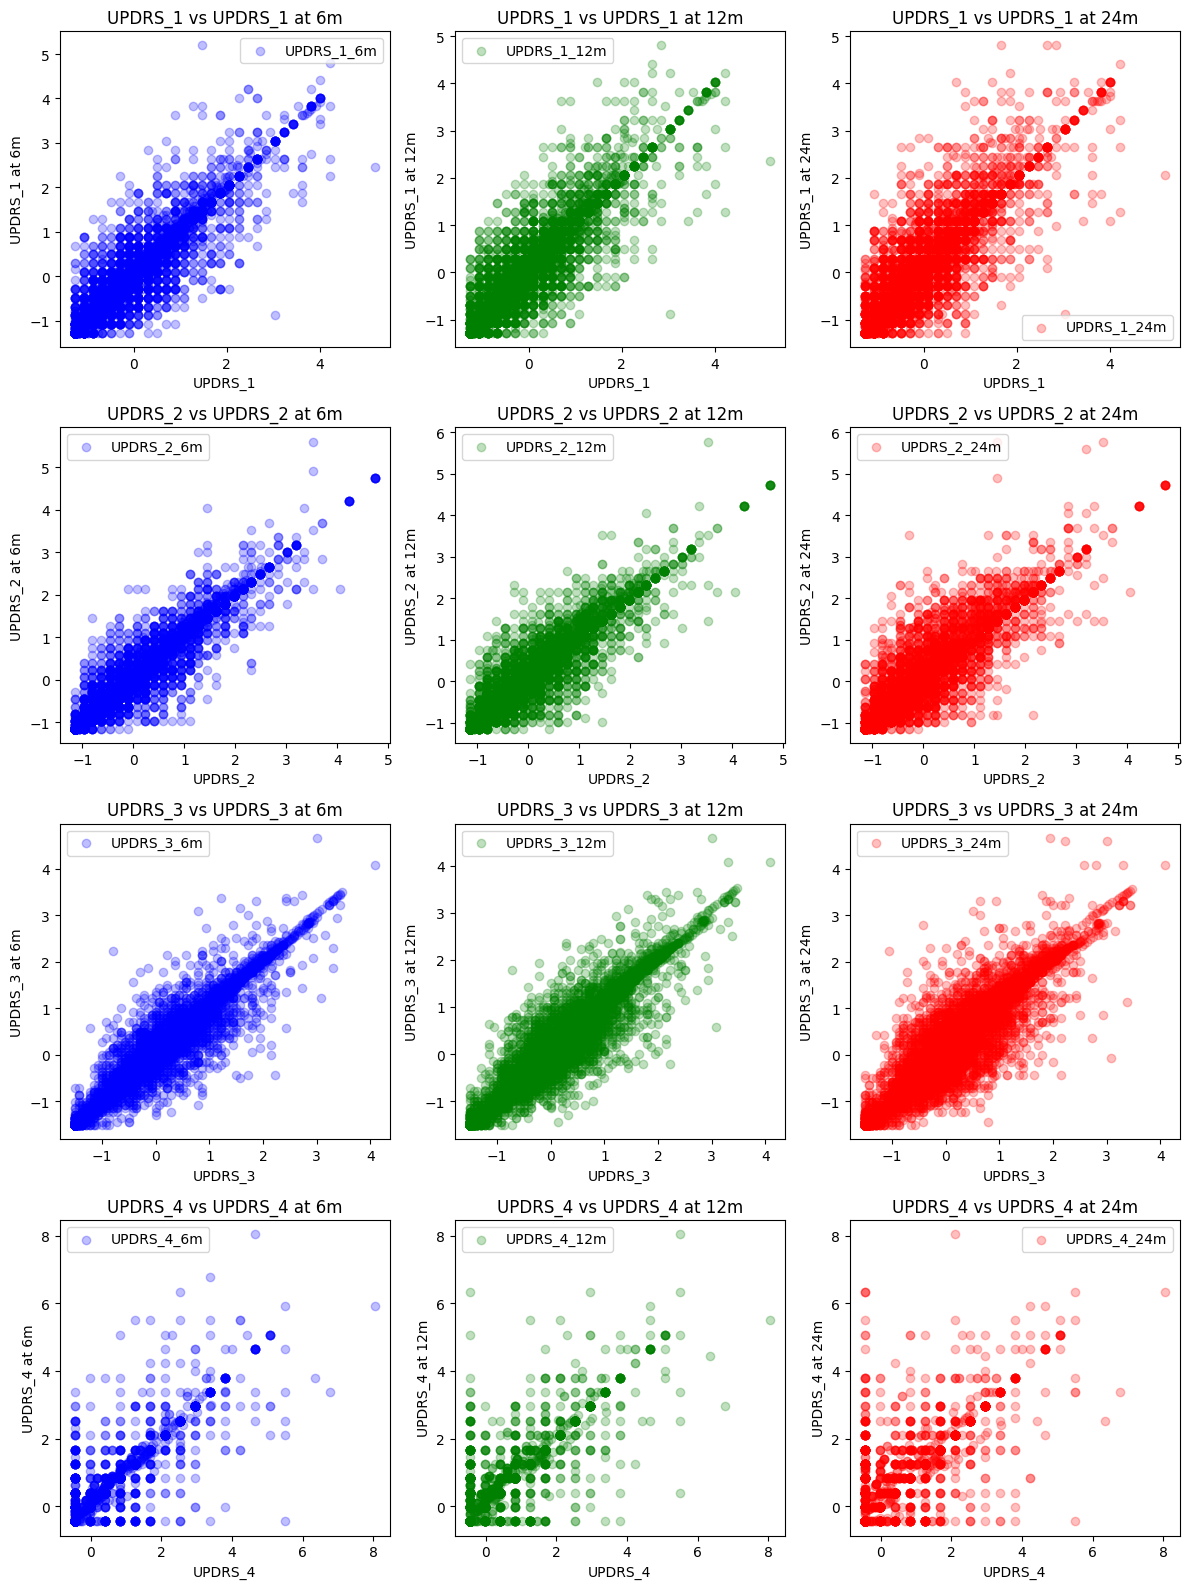

In [136]:
# Create a figure with a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))

# Plot UPDRS scores for each UPDRS score type
for i in range(1, 5):
    # Plot UPDRS scores at 6 months
    axes[i-1, 0].set_title(f'UPDRS_{i} vs UPDRS_{i} at 6m')
    axes[i-1, 0].set_xlabel(f'UPDRS_{i}')
    axes[i-1, 0].set_ylabel(f'UPDRS_{i} at 6m')
    axes[i-1, 0].scatter(combined_data[f'updrs_{i}'], combined_data[f'updrs_{i}_6m'], color='blue', label='UPDRS_{}_6m'.format(i), alpha=0.25)
    axes[i-1, 0].legend()

    # Plot UPDRS scores at 12 months
    axes[i-1, 1].set_title(f'UPDRS_{i} vs UPDRS_{i} at 12m')
    axes[i-1, 1].set_xlabel(f'UPDRS_{i}')
    axes[i-1, 1].set_ylabel(f'UPDRS_{i} at 12m')
    axes[i-1, 1].scatter(combined_data[f'updrs_{i}'], combined_data[f'updrs_{i}_12m'], color='green', label='UPDRS_{}_12m'.format(i), alpha=0.25)
    axes[i-1, 1].legend()

    # Plot UPDRS scores at 24 months
    axes[i-1, 2].set_title(f'UPDRS_{i} vs UPDRS_{i} at 24m')
    axes[i-1, 2].set_xlabel(f'UPDRS_{i}')
    axes[i-1, 2].set_ylabel(f'UPDRS_{i} at 24m')
    axes[i-1, 2].scatter(combined_data[f'updrs_{i}'], combined_data[f'updrs_{i}_24m'], color='red', label='UPDRS_{}_24m'.format(i), alpha=0.25)
    axes[i-1, 2].legend()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [150]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor

# Define function to evaluate XGBoost model
def evaluate_xgb_model(model, input_feature, target_label, data):
    # Remove rows with NaN values in the target column
    data_filtered = data.dropna(subset=[target_label])

    # Predict the UPDRS scores
    predictions = model.predict(data_filtered[[input_feature]])

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(data_filtered[target_label], predictions)
    return mse

# Train separate XGBoost models for each UPDRS score and evaluate them on the validation data
for i in range(1, 5):
    input_feature = f'updrs_{i}'
    print(input_feature)
    for j in [6, 12, 24]:
        target_label = f'updrs_{i}_{j}m'

        # Train the XGBoost model
        model = XGBRegressor(objective='reg:squarederror')
        model.fit(train_data[[input_feature]], train_data[target_label])

        # Evaluate the model using Mean Squared Error (MSE) on validation and test sets
        val_mse = evaluate_xgb_model(model, input_feature, target_label, val_data)

        # Print the results
        print(f'MSE for {target_label}:{val_mse:.3f}')


updrs_1
MSE for updrs_1_6m:0.144
MSE for updrs_1_12m:0.174
MSE for updrs_1_24m:0.255
updrs_2
MSE for updrs_2_6m:0.099
MSE for updrs_2_12m:0.136
MSE for updrs_2_24m:0.210
updrs_3
MSE for updrs_3_6m:0.093
MSE for updrs_3_12m:0.133
MSE for updrs_3_24m:0.217
updrs_4
MSE for updrs_4_6m:0.189
MSE for updrs_4_12m:0.268
MSE for updrs_4_24m:0.411


In [186]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

feature_columns = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
target_columns = ['updrs_1_6m', 'updrs_2_6m', 'updrs_3_6m', 'updrs_4_6m',
                  'updrs_1_12m', 'updrs_2_12m', 'updrs_3_12m', 'updrs_4_12m',
                  'updrs_1_24m', 'updrs_2_24m', 'updrs_3_24m', 'updrs_4_24m']

X_train = train_data[feature_columns]
y_train = train_data[target_columns]
X_val = val_data[feature_columns]
y_val = val_data[target_columns]
X_test = test_data[feature_columns]
y_test = test_data[target_columns]

n_estimators = [50, 150, 250, 500, 1000]
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3]
mean_distances = []
mean_times = []

results = [[None for _ in range(len(n_estimators))] for _ in range(len(learning_rates))]


In [185]:
for i, lr in enumerate(learning_rates):
    for j, n_est in enumerate(n_estimators):
        models = {}
        mean_mse = []
        start_time = time.time()
        for target in target_columns:
            model = xgb.XGBRegressor(
                objective='reg:squarederror', n_estimators=n_est,
                max_depth=7, learning_rate=lr, seed=33, reg_alpha=0.1
            )
            model.fit(X_train, y_train[target])
            models[target] = model
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val[target], y_pred)
            mean_mse.append(mse)

        # Compute the Euclidean distance between the predicted and actual target values for each observation
        y_pred_all = pd.DataFrame(index=y_val.index, columns=target_columns)
        for target, model in models.items():
            y_pred = model.predict(X_val)
            y_pred_all[target] = y_pred
        distances = np.sqrt(np.sum((y_val.values - y_pred_all.values) ** 2, axis=1))

        # Compute the mean Euclidean distance across all observations and the time taken by the run
        end_time = time.time()
        mean_time = end_time - start_time
        mean_distance = np.mean(distances)
        
        # Store the results in the 2D array
        results[i][j] = (mean_distance, mean_time)


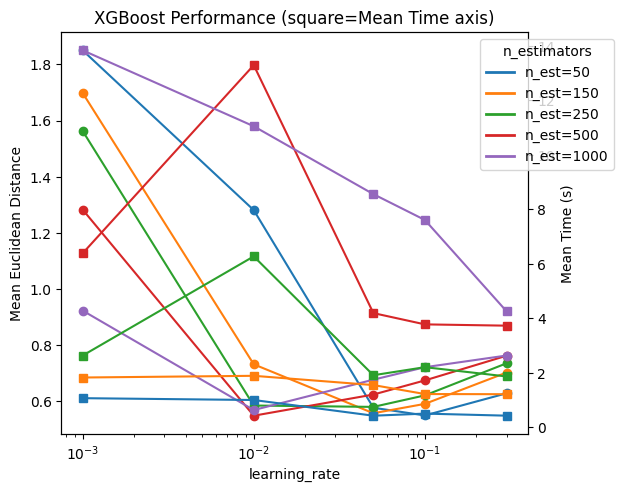

In [172]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Extract mean distances and mean times from the results
mean_distances = []
mean_times = []
for i, lr in enumerate(learning_rates):
    temp_distances = []
    temp_times = []
    for j, n_est in enumerate(n_estimators):
        mean_distance, mean_time = results[i][j]
        temp_distances.append(mean_distance)
        temp_times.append(mean_time)
    mean_distances.append(temp_distances)
    mean_times.append(temp_times)

# Create the plot
fig, ax1 = plt.subplots()

ax1.set_xlabel('learning_rate')
ax1.set_ylabel('Mean Euclidean Distance')

colors = list(mcolors.TABLEAU_COLORS.values())  # Use tableau colors for better visualization

for j, n_est in enumerate(n_estimators):
    ax1.semilogx(learning_rates, [mean_distances[i][j] for i in range(len(learning_rates))], '-o', color=colors[j])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_ylabel('Mean Time (s)')
for j, n_est in enumerate(n_estimators):
    ax2.plot(learning_rates, [mean_times[i][j] for i in range(len(learning_rates))], '-s', color=colors[j])  # Use square markers
ax2.tick_params(axis='y')

# Create a custom legend with only n_est values and corresponding colors
legend_elements = [Line2D([0], [0], color=colors[j], lw=2, label=f'n_est={n_est}') for j, n_est in enumerate(n_estimators)]
plt.legend(handles=legend_elements, title="n_estimators", bbox_to_anchor=(1.2, 1))
fig.tight_layout()
plt.title('XGBoost Performance (square=Mean Time axis)')
plt.show()


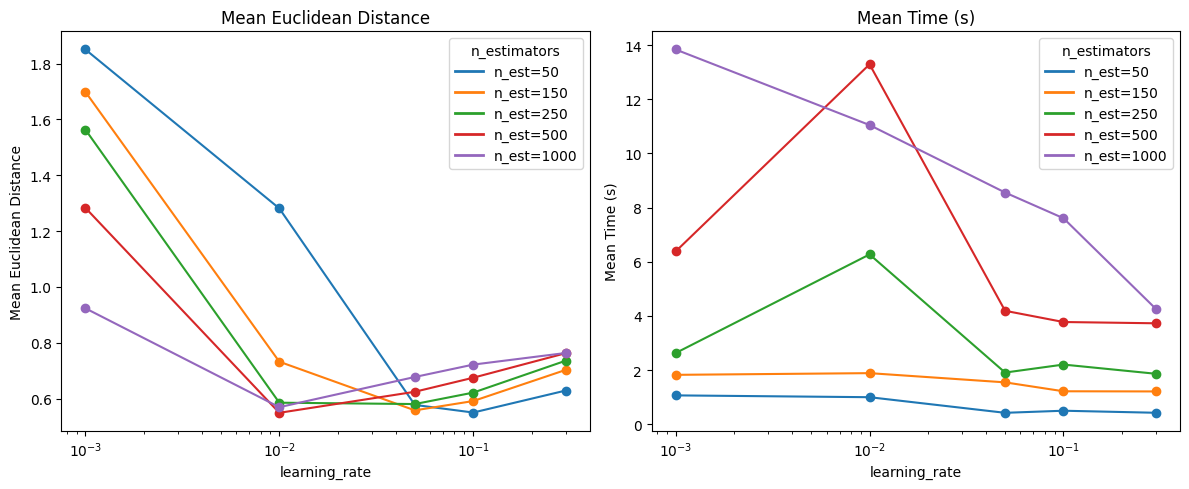

In [177]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Extract mean distances and mean times from the results
mean_distances = []
mean_times = []
for i, lr in enumerate(learning_rates):
    temp_distances = []
    temp_times = []
    for j, n_est in enumerate(n_estimators):
        mean_distance, mean_time = results[i][j]
        temp_distances.append(mean_distance)
        temp_times.append(mean_time)
    mean_distances.append(temp_distances)
    mean_times.append(temp_times)

# Create the plot for Mean Euclidean Distance
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_xlabel('learning_rate')
ax1.set_ylabel('Mean Euclidean Distance')
ax1.set_title('Mean Euclidean Distance')

colors = list(mcolors.TABLEAU_COLORS.values())  # Use tableau colors for better visualization

for j, n_est in enumerate(n_estimators):
    ax1.semilogx(learning_rates, [mean_distances[i][j] for i in range(len(learning_rates))], '-o', color=colors[j])
ax1.tick_params(axis='y')

# Create a custom legend with only n_est values and corresponding colors
legend_elements = [Line2D([0], [0], color=colors[j], lw=2, label=f'n_est={n_est}') for j, n_est in enumerate(n_estimators)]
ax1.legend(handles=legend_elements, title="n_estimators")

# Create the plot for Mean Time
ax2.set_xlabel('learning_rate')
ax2.set_ylabel('Mean Time (s)')
ax2.set_title('Mean Time (s)')

for j, n_est in enumerate(n_estimators):
    ax2.semilogx(learning_rates, [mean_times[i][j] for i in range(len(learning_rates))], '-o',color=colors[j])  # Use square markers
ax2.tick_params(axis='y')

# Create a custom legend with only n_est values and corresponding colors
legend_elements = [Line2D([0], [0], color=colors[j], lw=2, label=f'n_est={n_est}') for j, n_est in enumerate(n_estimators)]
ax2.legend(handles=legend_elements, title="n_estimators")

fig.tight_layout()
plt.show()


Use 10e-1 for learning_rate

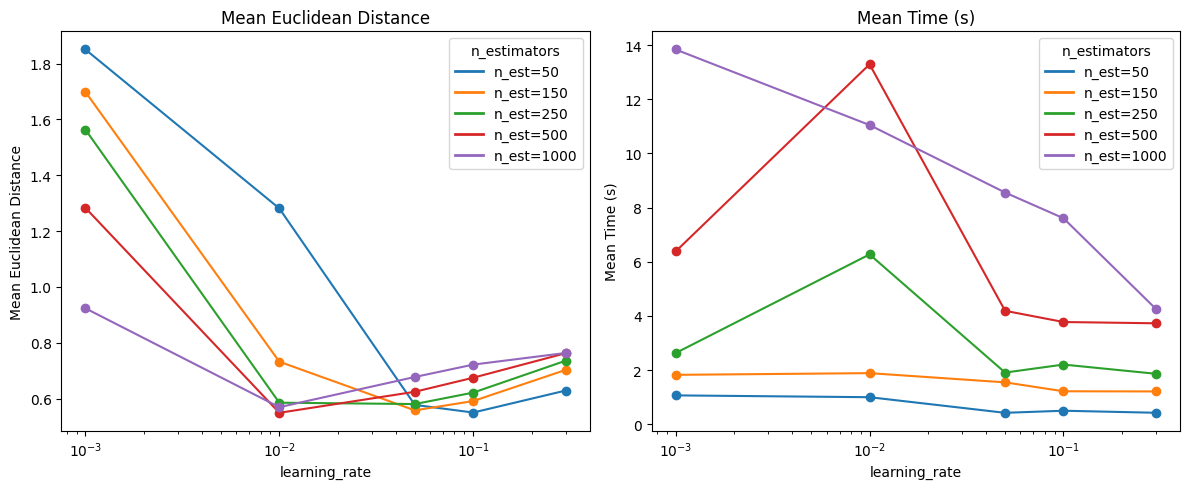

In [187]:
train_data.columns

Index(['patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'updrs_1_6m', 'updrs_2_6m', 'updrs_3_6m', 'updrs_4_6m', 'updrs_1_12m',
       'updrs_2_12m', 'updrs_3_12m', 'updrs_4_12m', 'updrs_1_24m',
       'updrs_2_24m', 'updrs_3_24m', 'updrs_4_24m'],
      dtype='object')

In [188]:
y_train.columns

Index(['updrs_1_6m', 'updrs_2_6m', 'updrs_3_6m', 'updrs_4_6m', 'updrs_1_12m',
       'updrs_2_12m', 'updrs_3_12m', 'updrs_4_12m', 'updrs_1_24m',
       'updrs_2_24m', 'updrs_3_24m', 'updrs_4_24m'],
      dtype='object')

In [189]:
for input_feature in feature_columns:
    print(input_feature)
    for target_label in target_columns:
        print(target_label)
        model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, seed=33)
        model.fit(X_train[input_feature], y_train[target_label])
        y_pred = model.predict(X_val[input_feature])
        mse = mean_squared_error(y_val[target_label], y_pred)
        print(f"MSE: {mse:.2f}")


updrs_1
updrs_1_6m
MSE: 0.26
updrs_2_6m
MSE: 0.63
updrs_3_6m
MSE: 0.82
updrs_4_6m
MSE: 0.89
updrs_1_12m
MSE: 0.29
updrs_2_12m
MSE: 0.66
updrs_3_12m
MSE: 0.86
updrs_4_12m
MSE: 0.84
updrs_1_24m
MSE: 0.35
updrs_2_24m
MSE: 0.73
updrs_3_24m
MSE: 0.92
updrs_4_24m
MSE: 0.86
updrs_2
updrs_1_6m
MSE: 0.62
updrs_2_6m
MSE: 0.22
updrs_3_6m
MSE: 0.59
updrs_4_6m
MSE: 0.93
updrs_1_12m
MSE: 0.64
updrs_2_12m
MSE: 0.25
updrs_3_12m
MSE: 0.62
updrs_4_12m
MSE: 0.91
updrs_1_24m
MSE: 0.67
updrs_2_24m
MSE: 0.32
updrs_3_24m
MSE: 0.67
updrs_4_24m
MSE: 0.94
updrs_3
updrs_1_6m
MSE: 0.80
updrs_2_6m
MSE: 0.66
updrs_3_6m
MSE: 0.21
updrs_4_6m
MSE: 0.97
updrs_1_12m
MSE: 0.82
updrs_2_12m
MSE: 0.69
updrs_3_12m
MSE: 0.25
updrs_4_12m
MSE: 0.95
updrs_1_24m
MSE: 0.85
updrs_2_24m
MSE: 0.76
updrs_3_24m
MSE: 0.32
updrs_4_24m
MSE: 0.98
updrs_4
updrs_1_6m
MSE: 0.80
updrs_2_6m
MSE: 0.82
updrs_3_6m
MSE: 0.84
updrs_4_6m
MSE: 0.31
updrs_1_12m
MSE: 0.83
updrs_2_12m
MSE: 0.85
updrs_3_12m
MSE: 0.88
updrs_4_12m
MSE: 0.35
updrs_1_24m
MSE:

In [190]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

results = {}

for i in range(1, 5):
    input_feature = f'updrs_{i}'
    for j in [6, 12, 24]:
        target_label = f'updrs_{i}_{j}m'
        print(input_feature, target_label)
        xgb_model = xgb.XGBRegressor(
            objective='reg:squarederror',
            learning_rate=0.01,
            seed=33
        )

        params = {
            'n_estimators': st.randint(100, 750),
            'max_depth': st.randint(3, 8),
            'reg_alpha': st.uniform(0.1, 10.0),
        }

        search = RandomizedSearchCV(xgb_model, params, n_iter=10, cv=5, random_state=33)
        search.fit(X_train[input_feature], y_train[target_label])

        results[target_label] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'best_estimator': search.best_estimator_
        }


updrs_1
updrs_2
updrs_3
updrs_4


In [201]:
for target_label, search_results in results.items():
    for key, value in search_results.items():
        if key == 'best_estimator':
            continue  # Skip the model object
        print(f"{target_label}, {key}: {value}")


updrs_1_6m, best_params: {'max_depth': 5, 'n_estimators': 679, 'reg_alpha': 2.577682844367063}
updrs_1_6m, best_score: 0.8327085852253836
updrs_1_12m, best_params: {'max_depth': 3, 'n_estimators': 714, 'reg_alpha': 7.557664607701213}
updrs_1_12m, best_score: 0.8078817869631887
updrs_1_24m, best_params: {'max_depth': 3, 'n_estimators': 714, 'reg_alpha': 7.557664607701213}
updrs_1_24m, best_score: 0.7655401121166536
updrs_2_6m, best_params: {'max_depth': 3, 'n_estimators': 714, 'reg_alpha': 7.557664607701213}
updrs_2_6m, best_score: 0.8892387717032214
updrs_2_12m, best_params: {'max_depth': 3, 'n_estimators': 714, 'reg_alpha': 7.557664607701213}
updrs_2_12m, best_score: 0.8616725580253457
updrs_2_24m, best_params: {'max_depth': 3, 'n_estimators': 714, 'reg_alpha': 7.557664607701213}
updrs_2_24m, best_score: 0.8089007744874707
updrs_3_6m, best_params: {'max_depth': 5, 'n_estimators': 679, 'reg_alpha': 2.577682844367063}
updrs_3_6m, best_score: 0.8873209284863168
updrs_3_12m, best_params: 

In [230]:
results['updrs_1_6m']['best_estimator']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=679, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [203]:
# Train and evaluate final model for each UPDRS feature
for i in range(1, 5):
    input_feature = f'updrs_{i}'
    for j in [6, 12, 24]:
        target_label = f'updrs_{i}_{j}m'
        # Initialize XGBoost model with best hyperparameters
        xgb_model = xgb.XGBRegressor(
            objective='reg:squarederror',
            learning_rate=0.01,
            max_depth=results[target_label]['best_params']['max_depth'],
            n_estimators=results[target_label]['best_params']['n_estimators'],
            reg_alpha=results[target_label]['best_params']['reg_alpha'],
            seed=33
        )
        # Train on entire training data
        xgb_model.fit(X_train[input_feature], y_train[target_label])
        # Evaluate on test data
        y_pred = xgb_model.predict(X_test[input_feature])
        mse = mean_squared_error(y_test[target_label], y_pred)
        mae = mean_absolute_error(y_test[target_label], y_pred)
        print(f"{target_label} - Test MSE: {mse:.2f}, Test MAE: {mae:.2f}")


updrs_1_6m - Test MSE: 0.10, Test MAE: 0.20
updrs_1_12m - Test MSE: 0.15, Test MAE: 0.24
updrs_1_24m - Test MSE: 0.20, Test MAE: 0.29
updrs_2_6m - Test MSE: 0.08, Test MAE: 0.18
updrs_2_12m - Test MSE: 0.12, Test MAE: 0.21
updrs_2_24m - Test MSE: 0.16, Test MAE: 0.26
updrs_3_6m - Test MSE: 0.10, Test MAE: 0.17
updrs_3_12m - Test MSE: 0.13, Test MAE: 0.22
updrs_3_24m - Test MSE: 0.19, Test MAE: 0.28
updrs_4_6m - Test MSE: 0.05, Test MAE: 0.10
updrs_4_12m - Test MSE: 0.09, Test MAE: 0.14
updrs_4_24m - Test MSE: 0.15, Test MAE: 0.21


In [251]:
import pandas as pd
import numpy as np

# Step 1: Normalize input data using mean and std values
mean_values = pd.Series([7.110559, 6.743590, 19.421236, 1.861763], index=['updrs_1_0m', 'updrs_2_0m', 'updrs_3_0m', 'updrs_4_0m'])
std_values = pd.Series([5.525955, 6.323230, 15.000289, 3.022112], index=['updrs_1_0m', 'updrs_2_0m', 'updrs_3_0m', 'updrs_4_0m'])

raw_patient_data = pd.DataFrame({
    'updrs_1_0m': [15],
    'updrs_2_0m': [30],
    'updrs_3_0m': [12],
    'updrs_4_0m': [3]
}, index=[0])

normalized_patient_data = (raw_patient_data - mean_values) / std_values

# Step 2: Load the trained models
models = {
    'UPDRS 1': ['updrs_1_6m', 'updrs_1_12m', 'updrs_1_24m'],
    'UPDRS 2': ['updrs_2_6m', 'updrs_2_12m', 'updrs_2_24m'],
    'UPDRS 3': ['updrs_3_6m', 'updrs_3_12m', 'updrs_3_24m'],
    'UPDRS 4': ['updrs_4_6m', 'updrs_4_12m', 'updrs_4_24m']
}

# Step 3: Make predictions for the patient's UPDRS scores at 6 months, 12 months, and 24 months
for idx, (name, model_names) in enumerate(models.items()):
    print(f'{name} score predictions:')
    for model_name in model_names:
        model = results[model_name]['best_estimator']
        pred_normalized = model.predict(normalized_patient_data[[f'updrs_{idx+1}_0m']])
        pred_unnormalized = (pred_normalized * std_values[f'updrs_{idx+1}_0m']) + mean_values[f'updrs_{idx+1}_0m']
        time_point = model_name.split("_")[-1]
        print(f'{time_point} months: {pred_unnormalized[0]:.2f}')
    print()


UPDRS 1 score predictions:
6m months: 14.92
12m months: 14.87
24m months: 15.29

UPDRS 2 score predictions:
6m months: 29.12
12m months: 26.49
24m months: 27.23

UPDRS 3 score predictions:
6m months: 12.23
12m months: 12.33
24m months: 12.94

UPDRS 4 score predictions:
6m months: 3.17
12m months: 3.02
24m months: 3.39

